In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Create model
input_shape = (32, 32, 3)
n_classes = 10

input = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer='he_normal')(input)
x = keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = keras.layers.Conv2D(128, 5, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, 3, padding='valid', activation='relu', kernel_initializer='he_normal')(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Conv2D(256, 3, padding='valid', activation='relu')(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = keras.layers.Dense(256, activation='sigmoid', kernel_initializer='he_normal')(x)
x = keras.layers.Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)

model = keras.Model(inputs=[input], outputs=[x])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       1475

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=32, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 6s 18ms/step - loss: 1.9717 - accuracy: 0.2633 - val_loss: 1.3650 - val_accuracy: 0.5105
Epoch 2/32
313/313 [==============================] - 5s 17ms/step - loss: 1.2610 - accuracy: 0.5434 - val_loss: 1.1314 - val_accuracy: 0.5971
Epoch 3/32
313/313 [==============================] - 5s 17ms/step - loss: 1.0154 - accuracy: 0.6404 - val_loss: 0.9366 - val_accuracy: 0.6732
Epoch 4/32
313/313 [==============================] - 5s 17ms/step - loss: 0.8234 - accuracy: 0.7128 - val_loss: 0.8342 - val_accuracy: 0.7084
Epoch 5/32
313/313 [==============================] - 5s 17ms/step - loss: 0.6610 - accuracy: 0.7697 - val_loss: 0.7822 - val_accuracy: 0.7300
Epoch 6/32
313/313 [==============================] - 5s 17ms/step - loss: 0.5368 - accuracy: 0.8149 - val_loss: 0.7665 - val_accuracy: 0.7403
Epoch 7/32
313/313 [==============================] - 5s 17ms/step - loss: 0.4368 - accuracy: 0.8479 - val_loss: 0.7582 - val_accuracy: 0.7537

In [ ]:
model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

[1.332472801208496, 0.7524999976158142]

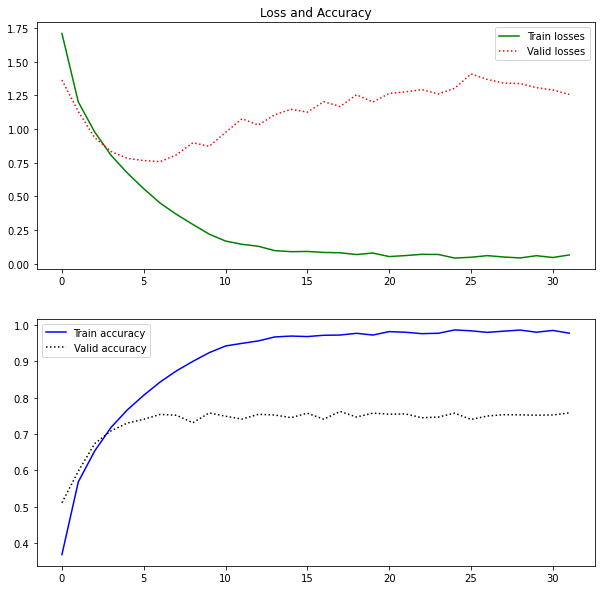

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history.history['loss'], '-g', label='Train losses')
axes[0].plot(history.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()